In [6]:
# Machine Learning - Predictive Analysis using Red Wine Data

#Import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# required for roc curve and auc score
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [7]:
# Load red wine data as rWine
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
rWine = pd.read_csv(dataset_url, sep=';')


In [3]:
rWine.head(10) # Print first 10 rows of the DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [49]:
# Split data into training and test sets
y = rWine.quality
X = rWine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


In [50]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
clf = regressor.fit(X_train, y_train)


In [51]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [52]:
# Evaluating the Test set results
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.30260002699603983
0.4500136778926727


In [53]:
# Fitting Random Forest Decision Tree Regression to the Training set
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
clf = regressor.fit(X_train, y_train)


In [54]:
# Predicting the Test set results
y_pred = clf.predict(X_test)


In [55]:
# Evaluating the Test set results
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.40974635268478754
0.3808749999999999


In [56]:
y_pred 

array([6.5, 5.4, 5.3, 5.6, 6. , 5.7, 4.8, 4.7, 5. , 6. , 5.2, 5.6, 5.8,
       4.9, 5.5, 5.3, 6.8, 5.8, 5.8, 7. , 5.9, 5.6, 5. , 6. , 6. , 5. ,
       5.7, 5. , 6.1, 5.8, 5.8, 7. , 5.9, 5. , 5. , 5.8, 5. , 6.2, 5.3,
       5.9, 4.7, 5.6, 7.3, 5.3, 6.3, 5.2, 5.7, 5.3, 5. , 6.6, 6.3, 4.9,
       5.9, 5. , 5.7, 5.7, 5.2, 5.1, 5. , 5.2, 5.2, 5.4, 5. , 6. , 5.9,
       5.5, 6.4, 5. , 5. , 6.5, 5.8, 5.5, 5. , 5.1, 5.6, 6. , 5.2, 5.3,
       5.4, 5.3, 6.7, 5.6, 6.4, 6.5, 5.2, 6.2, 6.7, 6.2, 5.7, 5.8, 6.2,
       5.7, 6.3, 5.8, 5.8, 5.8, 6.9, 7.4, 5.3, 6.7, 5. , 5.3, 5.1, 6.4,
       5. , 4.9, 5.7, 5.1, 5.5, 6.1, 5.6, 5. , 6. , 5.5, 5. , 5.2, 6.1,
       5.2, 4.7, 6.1, 5.9, 5. , 5.7, 6. , 5.3, 5.3, 5.2, 5.6, 5.6, 5.6,
       5.8, 6.2, 5.1, 5.2, 5.1, 6.1, 5. , 5.1, 6.8, 5.5, 5.3, 5. , 5.9,
       6.1, 5.2, 5.5, 5.1, 7. , 5.4, 5. , 5.6, 5.1, 4.9, 5. , 5.6, 5.8,
       5.3, 6. , 6. , 5.1, 5.5, 5.3, 5.3, 6.2, 5.2, 6. , 5.4, 6. , 5.6,
       5. , 5.9, 5.4, 5.8, 5. , 5.7, 5.5, 4.9, 5.5, 5.4, 5. , 6.

In [57]:
# defining Python function to plot ROC and AUC
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [58]:
#Generate Sample Data
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [59]:
#Split the data into train and test sub-datasets.
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.2, random_state=1)

In [60]:
# Fit a model on the train data.
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
#Predict probabilities for the test data.
probs = model.predict_proba(testX)

In [62]:
#Keep Probabilities of the positive class only.
probs = probs[:, 1]


In [63]:
#Compute the AUC Score.
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.94


In [64]:
#Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(testy, probs)


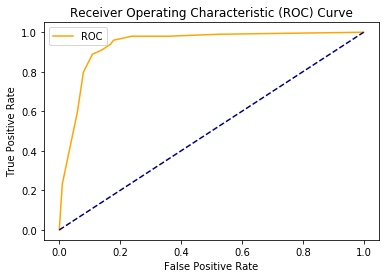

In [65]:
#Plot ROC Curve using defined function
plot_roc_curve(fpr, tpr)